# Single Shot MultiBox Detector (SSD)

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the pre-trained model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
detector = hub.load(model_url)

In [20]:
# Load and preprocess the image
image = cv2.imread('/content/match.jpeg')
desired_width, desired_height = 300, 300  # Adjust as needed
input_image = cv2.resize(image, (desired_width, desired_height))
input_image = np.expand_dims(input_image, axis=0)

In [21]:
# Perform object detection
results = detector(input_image)

In [22]:
# Extract bounding boxes, class IDs, and scores
boxes = results["detection_boxes"][0].numpy()
class_ids = results["detection_classes"][0].numpy().astype(int)
scores = results["detection_scores"][0].numpy()

In [23]:
# Define a confidence threshold (adjust as needed)
confidence_threshold = 0.5

In [24]:
# Filter out detections with low confidence
filtered_indices = np.where(scores >= confidence_threshold)[0]
filtered_boxes = boxes[filtered_indices]
filtered_class_ids = class_ids[filtered_indices]

In [25]:
# Convert BGR image to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

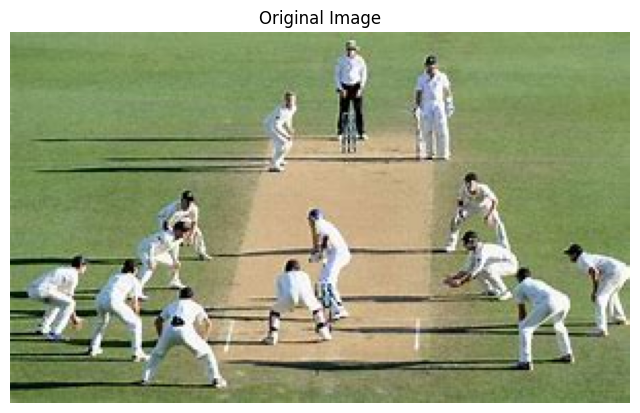

In [26]:
# Display the original image without bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [27]:
# Draw bounding boxes on the image
for box, class_id in zip(filtered_boxes, filtered_class_ids):
    y1, x1, y2, x2 = box
    y1, x1, y2, x2 = int(y1 * image.shape[0]), int(x1 * image.shape[1]), int(y2 * image.shape[0]), int(x2 * image.shape[1])
    class_name = str(class_id)  # You may have a class mapping for class names
    color = (0, 255, 0)  # Green color for bounding boxes
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness=2)
    cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [28]:
# Convert BGR image to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

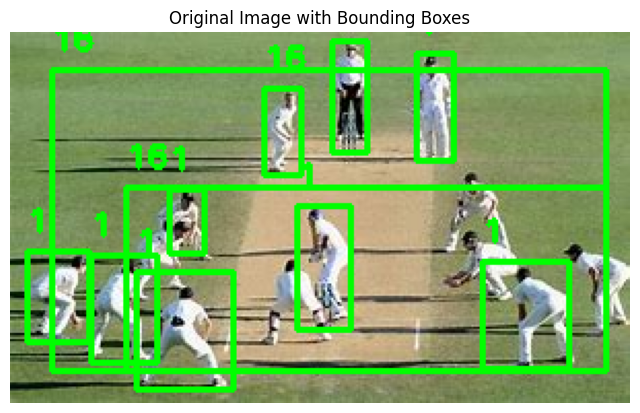

In [29]:
# Display the original image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.title('Original Image with Bounding Boxes')
plt.axis('off')
plt.show()

# Face Detection using Haar Cascades


In [54]:
import cv2
import matplotlib.pyplot as plt1
from IPython.display import Image, display
# Load the image
image = cv2.imread('/content/lana.jpeg')

# Convert the image to grayscale (Haar cascades work on grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [58]:
# Load a pre-trained Haar cascade for face detection from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)



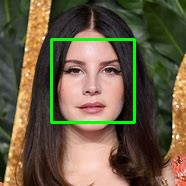

In [59]:
# Save the image with bounding boxes to a file
output_path = '/content/detected_faces.jpg'
cv2.imwrite(output_path, image)

# Display the saved image using IPython.display.Image
display(Image(output_path))